<a href="https://colab.research.google.com/github/Rakshithadhandre/Machine_Learning_Models/blob/main/SUV_Purchase_All_classifiers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/SUV_Purchase.csv")

In [41]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [42]:
df.shape

(400, 5)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


**converting non-numeric to numeric**

In [44]:
from sklearn import preprocessing

#label encoding
LE=preprocessing.LabelEncoder()

#fitting the technique to dataset
df.Gender=LE.fit_transform(df.Gender) #converting variables to numeric values
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


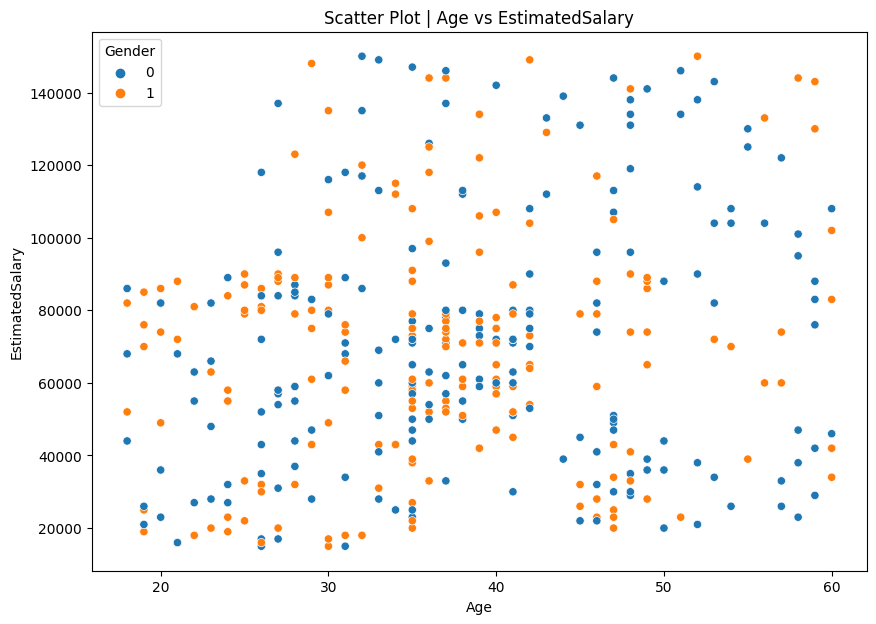

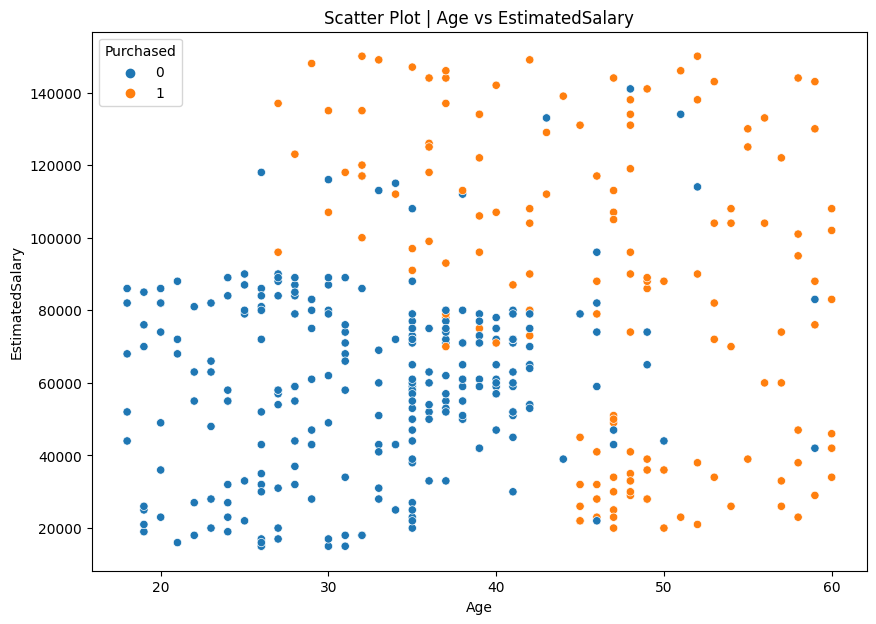

In [45]:
#visualization
import matplotlib.pyplot as plt
import seaborn as sns

def plot_vs(frame,col1,col2,hue):
  plt.figure(figsize=(10,7))
  sns.scatterplot(data=frame,x=col1,y=col2,hue=hue)
  plt.title(f"Scatter Plot | {col1} vs {col2}")

plot_vs(df,'Age','EstimatedSalary',	'Gender')
plot_vs(df,'Age','EstimatedSalary',	'Purchased')

In [46]:
#feature Engineering
#df.drop(['A'], axis=1)
df=df.drop(['User ID','Gender'],axis =1)#axis=1 i.e columns 

In [47]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


**Loading the data**

In [48]:
#method 1

#setting the data into input and output values
X=df.iloc[:,:-1].values #iloc==>index location 2D array
Y=df.iloc[:,-1:].values #2D array

In [ ]:
X

In [ ]:
Y

**Splitting the data**

In [51]:
#Training and Testing the dataset
#more data-Trainig; Less data-Testing datai.e Test set
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [ ]:
Y_train

In [ ]:
X_test

In [ ]:
Y_test

In [55]:
#Normalizing the data-Standard Scalar
from sklearn.preprocessing  import StandardScaler
sst=StandardScaler()
X_train=sst.fit_transform(X_train)
X_test=sst.transform(X_test)

In [ ]:
X_train


**LOGISTIC REGRESSION**

**Build the Model**

In [57]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

**Trainig the Model**

In [58]:
lr.fit(X_train,Y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

**Testing the Model**

In [78]:
y_pred=lr.predict(X_test)

In [79]:
print("predicted value for training data",lr.score(X_train,Y_train))
print("predicted value for training data",lr.score(X_test,Y_test))
print("overall accuracy",lr.score(sst.transform(X),Y));

predicted value for training data 0.821875
predicted value for training data 0.925
overall accuracy 0.8425


**KNN**

**Build the model**

In [61]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=20)

**Training the data**

In [62]:
#fitting the data
knn.fit(X_train,Y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=20)

**Testing the model**

In [63]:
y_pred=knn.predict(X_test)

In [64]:
print("predicted value for training data",knn.score(X_train,Y_train))
print("predicted value for training data",knn.score(X_test,Y_test))
print("overall accuracy",knn.score(sst.transform(X),Y))

predicted value for training data 0.903125
predicted value for training data 0.95
overall accuracy 0.9125


**Cross Validation-to find the best K value and make trails**

/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

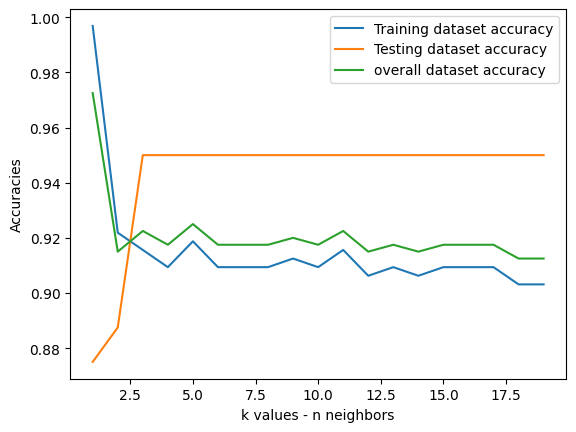

In [65]:
import numpy as np
neighbors = np.arange(1,20)
train_accuracy=np.empty(len(neighbors))
test_accuracy=np.empty(len(neighbors))
overall_accuracy=np.empty(len(neighbors))
#Loop over K values
for i,k in enumerate(neighbors):
  knn=KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train,Y_train)

  #Compute the training and testing accuracy of ML model
  train_accuracy[i]=knn.score(X_train,Y_train)
  test_accuracy[i]=knn.score(X_test,Y_test)

  #overall score
  overall_accuracy[i]=knn.score(sst.transform(X),Y)

import matplotlib.pyplot as plt
plt.plot(neighbors,train_accuracy,label='Training dataset accuracy')
plt.plot(neighbors,test_accuracy,label='Testing dataset accuracy')
plt.plot(neighbors,overall_accuracy,label='overall dataset accuracy')
plt.legend()
plt.xlabel('k values - n neighbors')
plt.ylabel("Accuracies")
plt.show()

**NAIVE BAYES**

**Build the model**

In [66]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()

**Train the model**

In [67]:
nb.fit(X_train,Y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

**Test the model**

In [68]:
y_pred=nb.predict(X_test)

In [69]:
print("predicted value for training data",nb.score(X_train,Y_train))
print("predicted value for training data",nb.score(X_test,Y_test))
print("overall accuracy",nb.score(sst.transform(X),Y))

predicted value for training data 0.884375
predicted value for training data 0.9125
overall accuracy 0.89


**DECISION TREE**

**Build the model**

In [70]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

**Training the model**

In [71]:
dt.fit(X_train,Y_train)

DecisionTreeClassifier()

**Testing the model**

In [77]:
y_pred=dt.predict(X_test)

In [73]:
print("Training Accuracy",dt.score(X_train,Y_train))
print("Testing accuracy",dt.score(X_test,Y_test))
print("Overall Accuracy",dt.score(sst.transform(X),Y))

Training Accuracy 0.996875
Testing accuracy 0.9125
Overall Accuracy 0.98


**RANDOM FOREST**

**Build the model**

In [74]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

**Train the model**

In [75]:
rf.fit(X_train,Y_train)

<ipython-input-75-70917fd5b97b>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,Y_train)


RandomForestClassifier()

**Test the model**

In [76]:
print("Training Accuracy",rf.score(X_train,Y_train))
print("Testing accuracy",rf.score(X_test,Y_test))
print("Overall Accuracy",rf.score(sst.transform(X),Y))

Training Accuracy 0.996875
Testing accuracy 0.9375
Overall Accuracy 0.985
